# AirBnb in London during pandemic

https://medium.com/analytics-vidhya/what-do-airbnb-listings-look-like-during-pandemic-a52a35504a84

https://github.com/es-g/airbnb_london/blob/master/Data_cleaning_notebook.ipynb

# Contents

- [Data Cleaning](#data-cleaning)
- [Visualise missing data using heatmap](#visualise-heatmap)
- [Dropping Initial Columns](#dropping-initial-columns)
- [Minimum and maximum nights columns](#nights-columns)
- [Host Related Columns](#host-related-columns)
- [Property Type](#property_type)
- [Bathrooms, Bedrooms, and Beds](#bathrooms-bedrooms-beds)
- [First_review and last_review](#first-last-review)
- [Review Scores](#review_scores)
- [Dealing with outliers in prices](#price-outliers)
- [Amenities](#amenities)
- [Host Response](#host-response)
- [Correlation Analysis](#correlation-analysis)

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

raw_df = pd.read_csv('listings.csv')

# Data Cleaning <a class="anchor" id="data-cleaning"></a>

In [2]:

pd.set_option("display.max_columns", raw_df.shape[1]) #display all columns
print(raw_df.shape)
raw_df.head()


(76984, 74)


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11551,https://www.airbnb.com/rooms/11551,20201106040109,2020-11-07,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,Not even 10 minutes by metro from Victoria Sta...,https://a0.muscache.com/pictures/b7afccf4-18e5...,43039,https://www.airbnb.com/users/show/43039,Adriano,2009-10-03,"London, England, United Kingdom","Hello, I'm a friendly Italian man with a very ...",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/47773...,https://a0.muscache.com/im/pictures/user/47773...,Brixton,3.0,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"London, United Kingdom",Lambeth,NaN,51.46225,-0.11732,Entire apartment,Entire home/apt,4,NaN,1 bath,1.0,3.0,"[""Cable TV"", ""Coffee maker"", ""Carbon monoxide ...",$97.00,7,190,7,28,1125,1125,8.4,1125.0,NaN,t,0,0,4,279,2020-11-07,192,7,0,2010-03-21,2020-03-26,91.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,t,2,2,0,0,1.48
1,13913,https://www.airbnb.com/rooms/13913,20201106040109,2020-11-07,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a day,83%,71%,f,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Islington, Greater London, United Kingdom",Islington,NaN,51.56802,-0.11121,Private room in apartment,Private room,2,NaN,1 shared bath,1.0,0.0,"[""Cable TV"", ""Bed linens"", ""Coffee maker"", ""Pa...",$40.00,1,29,1,28,29,29,2.8,29.0,NaN,t,30,60,90,365,2020-11-07,21,2,0,2010-08-18,2020-02-22,97.0,10.0,10.0,10.0,10.0,9.0,9.0,NaN,f,2,1,1,0,0.17
2,15400,https://www.airbnb.com/rooms/15400,20201106040109,2020-11-07,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,Philippa,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",within a day,100%,100%,f,https://a0.muscache.com/im/users/60302/profile...,https://a0.muscache.com/im/users/60302/profile...,Chelsea,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"London, United Kingdom",Kensington and Chelsea,NaN,51.48796,-0.16898,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Cable TV"", ""Coffee maker"", ""Dryer"", ""Dishes ...",$75.00,10,50,10,28,50,50,11.2,50.0,NaN,t,0,20,50,150,20

# Visualise missing data using heatmap <a class="anchor" id="visualise-heatmap"></a>

Black means data is missing. Beige means data is present. As you can see, there is a lot of missing data.

<AxesSubplot:>

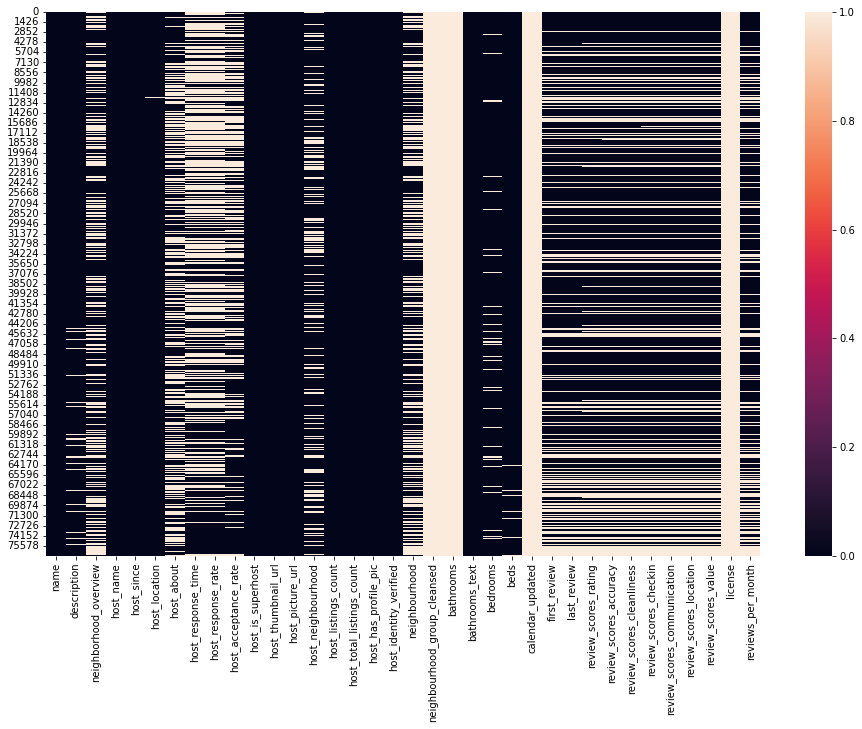

In [3]:
missing_val_cols = raw_df.columns[raw_df.isnull().sum() > 0]
fig, ax = plt.subplots(figsize=(16,10)) 
sns.heatmap(raw_df[missing_val_cols].isnull(), cbar=True)

# Dropping initial columns <a class="anchor" id="dropping-initial-columns"></a>
Natural Language Processing will not be used for price prediction (of course, this is something to consider, but is out of scope in this case). Hence, free text columns will be dropped. The plot above illustrates that we have columns where most of the values are missing. We will drop these columns as well. We will also be dropping the columns related to scraping of this dataset.

In [4]:
to_drop = ['listing_url', 'scrape_id', 'name', 'description', 'neighborhood_overview', 'picture_url',
              'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 
               'host_verifications', 'neighbourhood', 'neighbourhood_group_cleansed',
               'bathrooms', 'calendar_updated', 'calendar_last_scraped', 'license', 'host_picture_url', 
               'host_neighbourhood', 'host_response_time'
              ]

listings = raw_df.drop(to_drop, axis=1)

Print out the sum of missing values for every column. While we've dropped free text columns, we still need to do a lot of work in regards to missing data.

In [5]:
listings.isna().sum().sort_values(ascending=False)

host_response_rate                              37618
host_acceptance_rate                            28432
review_scores_checkin                           23603
review_scores_value                             23602
review_scores_location                          23601
review_scores_accuracy                          23555
review_scores_communication                     23552
review_scores_cleanliness                       23545
review_scores_rating                            23490
first_review                                    21733
last_review                                     21733
reviews_per_month                               21733
bedrooms                                         4746
beds                                             1080
bathrooms_text                                    160
host_total_listings_count                          11
host_identity_verified                             11
host_has_profile_pic                               11
host_listings_count         

# Minimum and maximum nights columns <a class="anchor" id="nights-columns"></a>
We can see that there are multiple columns for minimum and maximum night stays, but we'll only be using two main ones - **minimum_nights** and **maximum_nights**. Multiple columns are presumably due to the fact that minimum or maximum stays vary throughout the year. These columns mostly match the 'default' minimum_nights / maximum_nights columns, so we will drop them.

As a demonstration, below we can see about 85% of the maximum nights across the columns are the same. So it is safe to assume the two main columns are an accurate representation of the data.

In [6]:
print(100 * sum(listings.maximum_nights_avg_ntm == listings.maximum_nights) / len(listings)) 
print(100 * sum(listings.maximum_maximum_nights == listings.maximum_nights) / len(listings))

86.78946274550556
87.77797983996675


In [7]:
listings = listings.drop(['maximum_nights_avg_ntm', 'minimum_minimum_nights', 'minimum_maximum_nights',
                          'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
                          'minimum_nights_avg_ntm'], axis=1)

Let's check if boolean and numeric columns have enough varibility to make them worth including

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'host_id'}>,
        <AxesSubplot:title={'center':'host_is_superhost'}>,
        <AxesSubplot:title={'center':'host_listings_count'}>,
        <AxesSubplot:title={'center':'host_total_listings_count'}>,
        <AxesSubplot:title={'center':'host_has_profile_pic'}>],
       [<AxesSubplot:title={'center':'host_identity_verified'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'accommodates'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'beds'}>],
       [<AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'maximum_nights'}>,
        <AxesSubplot:title={'center':'has_availability'}>,
        <AxesSubplot:title={'center':'availability_30'}>,
        <AxesSubplot:title={'center':'availability_60'}>,
        <AxesSubplot:title={'center':'av

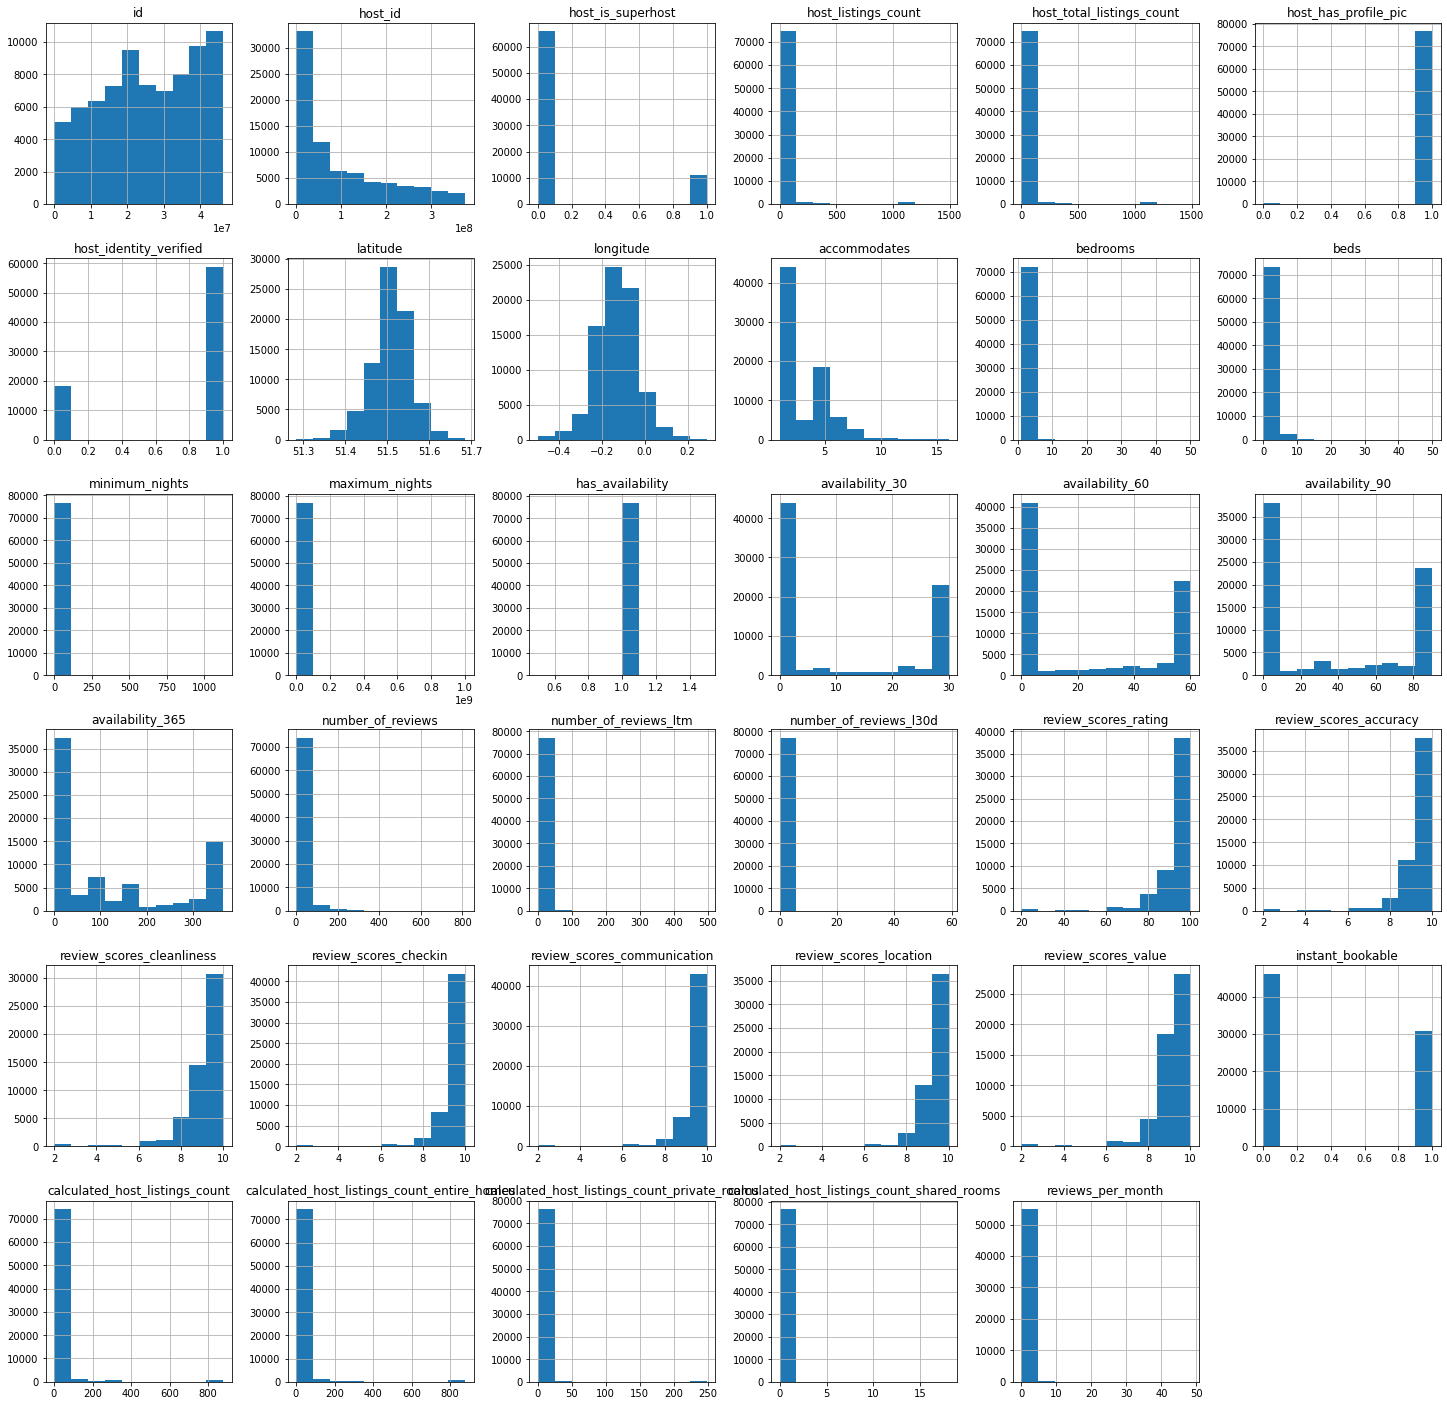

In [8]:
# Replace columns with categorical values t and f with 1 and 0
listings = listings.replace({'f': 0, 't': 1})

# Plot the histogram of numerical and boolean columns
listings.hist(figsize=(25, 25))

From the above, it can be seen that Column **has_availability** contains only one category.

There is very little variability in **calculated_host_listings_count_shared_rooms** columns.

So we will be dropping these columns

In [9]:
listings = listings.drop(['has_availability', 'calculated_host_listings_count_shared_rooms'], axis=1)

In [10]:
# Lambda function to remove special characters and convert to float
strip_and_convert = lambda col: col.str.extract('(\d+)', expand=False).astype(float, errors='ignore')

# strip_and_convert function wil be applied on the below columns
cols_to_numeric = ['host_response_rate', 'host_acceptance_rate', 'bathrooms_text', 'price']
listings[cols_to_numeric] = listings[cols_to_numeric].apply(strip_and_convert)
# Rename bathrooms_text column
listings = listings.rename(columns={'bathrooms_text': 'bathrooms'})
listings.head()

,id,last_scraped,host_id,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
0,11551,2020-11-07,43039,2009-10-03,100.0,100.0,0.0,3.0,3.0,1.0,1.0,Lambeth,51.46225,-0.11732,Entire apartment,Entire home/apt,4,1.0,1.0,3.0,"[""Cable TV"", ""Coffee maker"", ""Carbon monoxide ...",97.0,7,190,0,0,4,279,192,7,0,2010-03-21,2020-03-26,91.0,9.0,9.0,10.0,10.0,9.0,9.0,1,2,2,0,1.48
1,13913,2020-11-07,54730,2009-11-16,83.0,71.0,0.0,3.0,3.0,1.0,1.0,Islington,51.56802,-0.11121,Private room in apartment,Private room,2,1.0,1.0,0.0,"[""Cable TV"", ""Bed linens"", ""Coffee maker"", ""Pa...",40.0,1,29,30,60,90,365,21,2,0,2010-08-18,2020-02-22,97.0,10.0,10.0,10.0,10.0,9.0,9.0,0,2,1,1,0.17
2,15400,2020-11-07,60302,2009-12-05,100.0,100.0,0.0,1.0,1.0,1.0,1.0,Kensington and Chelsea,51.48796,-0.16898,Entire apartment,Entire home/apt,2,1.0,1.0,1.0,"[""Cable TV"", ""Coffee maker"", ""Dryer"", ""Dishes ...",75.0,10,50,0,20,50,150,89,1,0,2009-12-21,2020-03-16,96.0,10.0,10.0,10.0,10.0,10.0,9.0,1,1,1,0,0.67
3,17402,2020-11-06,67564,2010-01-04,67.0,100.0,1.0,18.0,18.0,1.0,1.0,Westminster,51.52195,-0.14094,Entire apartment,Entire home/apt,6,2.0,3.0,3.0,"[""Bed linens"", ""Coffee maker"", ""Dryer"", ""Paid ...",307.0,4,365,25,55,85,330,42,0,0,2011-03-21,2019-11-02,94.0,10.0,9.0,9.0,9.0,10.0,9.0,0,15,15,0,0.36
4,17506,2020-11-07,67915,2010-01-05,NaN,NaN,0.0,3.0,3.0,1.0,1.0,Hammersmith and Fulham,51.47935,-0.19743,Private room in bed and breakfast,Private room,2,1.0,1.0,1.0,"[""TV"", ""Heating"", ""Shower gel"", ""Wifi"", ""Smoke...",150.0,3,21,29,59,89,364,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,0,2,NaN


# Host related columns <a class="anchor" id="host-related-columns"></a>
As seen from the output below, there are 11 rows with missing values in some host related columns.

In [11]:
listings[['host_since', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified']].isnull().sum()

host_since                11
host_is_superhost         11
host_listings_count       11
host_has_profile_pic      11
host_identity_verified    11
dtype: int64

Since it's a small number, we will drop these rows.

In [12]:
listings = listings.dropna(subset=['host_since', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified'], axis=0)

listings[['host_since', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified']].isnull().sum()

host_since                0
host_is_superhost         0
host_listings_count       0
host_has_profile_pic      0
host_identity_verified    0
dtype: int64

In addition, the **host_since** column contains dates in the format **YYYY-MM-DD**.

To be able to use the column in our model, we will transform the **host_since** column to numerical: the new column will be the difference (in days) between the date the dataset was scraped and host_since column.

In [13]:
# Convert to datetime object
listings['last_scraped'] = pd.to_datetime(listings['last_scraped'])
listings['host_since'] = pd.to_datetime(listings['host_since'])

# Calculate the difference in days
listings['days_host_since'] = (listings['last_scraped'] - listings['host_since']).dt.days

# Remove host_since and other unnecessary columns
listings = listings.drop(['host_since', 'id', 'host_id'], axis=1)

listings['days_host_since'].describe()
listings.head()

,last_scraped,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month,days_host_since
0,2020-11-07,100.0,100.0,0.0,3.0,3.0,1.0,1.0,Lambeth,51.46225,-0.11732,Entire apartment,Entire home/apt,4,1.0,1.0,3.0,"[""Cable TV"", ""Coffee maker"", ""Carbon monoxide ...",97.0,7,190,0,0,4,279,192,7,0,2010-03-21,2020-03-26,91.0,9.0,9.0,10.0,10.0,9.0,9.0,1,2,2,0,1.48,4053
1,2020-11-07,83.0,71.0,0.0,3.0,3.0,1.0,1.0,Islington,51.56802,-0.11121,Private room in apartment,Private room,2,1.0,1.0,0.0,"[""Cable TV"", ""Bed linens"", ""Coffee maker"", ""Pa...",40.0,1,29,30,60,90,365,21,2,0,2010-08-18,2020-02-22,97.0,10.0,10.0,10.0,10.0,9.0,9.0,0,2,1,1,0.17,4009
2,2020-11-07,100.0,100.0,0.0,1.0,1.0,1.0,1.0,Kensington and Chelsea,51.48796,-0.16898,Entire apartment,Entire home/apt,2,1.0,1.0,1.0,"[""Cable TV"", ""Coffee maker"", ""Dryer"", ""Dishes ...",75.0,10,50,0,20,50,150,89,1,0,2009-12-21,2020-03-16,96.0,10.0,10.0,10.0,10.0,10.0,9.0,1,1,1,0,0.67,3990
3,2020-11-06,67.0,100.0,1.0,18.0,18.0,1.0,1.0,Westminster,51.52195,-0.14094,Entire apartment,Entire home/apt,6,2.0,3.0,3.0,"[""Bed linens"", ""Coffee maker"", ""Dryer"", ""Paid ...",307.0,4,365,25,55,85,330,42,0,0,2011-03-21,2019-11-02,94.0,10.0,9.0,9.0,9.0,10.0,9.0,0,15,15,0,0.36,3959
4,2020-11-07,NaN,NaN,0.0,3.0,3.0,1.0,1.0,Hammersmith and Fulham,51.47935,-0.19743,Private room in bed and breakfast,Private room,2,1.0,1.0,1.0,"[""TV"", ""Heating"", ""Shower gel"", ""Wifi"", ""Smoke...",150.0,3,21,29,59,89,364,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,0,2,NaN,3959


# Property Type <a class="anchor" id="property_type"></a>
We also need to perform some cleaning in property_type columns as there are too many categories whilst the majority of property types (~80%) belong to 3 categories only, i.e. Entire apartment, Private room in apartment and Private room in house.

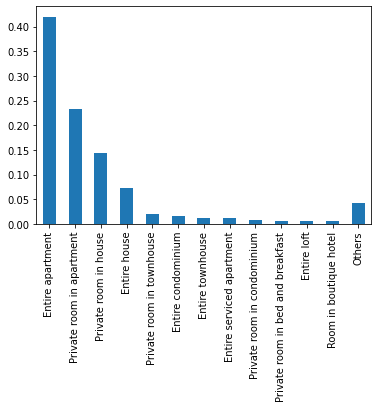

Property types: ['Entire apartment', 'Private room in apartment', 'Private room in house'] make up 79.75 % of the total property types


In [14]:
prob = listings['property_type'].value_counts(normalize=True)
# Setting a threshold. This threshold means that if the frequency of the property types that is less than this value, they will be categorised as 'Others'
threshold = 0.005
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['Others'] = tail_prob
prob.plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

print("Property types: {} make up {} % of the total property types".format(
    list(prob[:3].index), 
    round(prob[:3].sum(), 4) * 100
))

In [15]:
# Replace with Other if the frequency of the category is below set threshold (we set it at 0.005, refer to above) 
listings.loc[~listings['property_type'].isin(prob.index.drop('Others')), 'property_type'] = 'Others'
listings['property_type'].value_counts()

Entire apartment                     32299
Private room in apartment            17952
Private room in house                11136
Entire house                          5635
Others                                3283
Private room in townhouse             1552
Entire condominium                    1171
Entire townhouse                       976
Entire serviced apartment              966
Private room in condominium            622
Private room in bed and breakfast      524
Entire loft                            429
Room in boutique hotel                 428
Name: property_type, dtype: int64

# Bathrooms, bedrooms and beds <a class="anchor" id="bathrooms-bedrooms-beds"></a>
Since these are integer values, the missing values will be replaced with median

In [16]:
fill_median = lambda col: col.fillna(col.median())
listings[['bathrooms', 'bedrooms', 'beds']] = listings[['bathrooms', 'bedrooms', 'beds']].apply(fill_median)

listings[['bathrooms', 'bedrooms', 'beds']].isnull().sum()

bathrooms    0
bedrooms     0
beds         0
dtype: int64

# First_review and last_review <a class="anchor" id="first-last-review"></a>
More than 28% of the listings do not have any reviews. This is too many rows to drop. Furthermore, inputing the missing values is also not the best idea since this may skew the distribution significantly. However, the fact that there are missing values may give us meaningful information. This explains that listings with missing values are new bookings that have not yet have reviews. Hence, these values will be kept and will be categorised as 'No reviews'. These columns will be transformed to categorical

In [17]:
100 * listings[['first_review', 'last_review']].isnull().sum() / len(listings)

first_review    28.225482
last_review     28.225482
dtype: float64

In [18]:
# Convert to datetime object
listings['first_review'] = pd.to_datetime(listings['first_review'])
listings['last_review'] = pd.to_datetime(listings['last_review'])

# Calculate number of days between review date and the date the dataset was scrapped
listings['days_since_first_review'] = (listings['last_scraped'] - listings['first_review'])
listings['days_since_last_review'] = (listings['last_scraped'] - listings['last_review'])

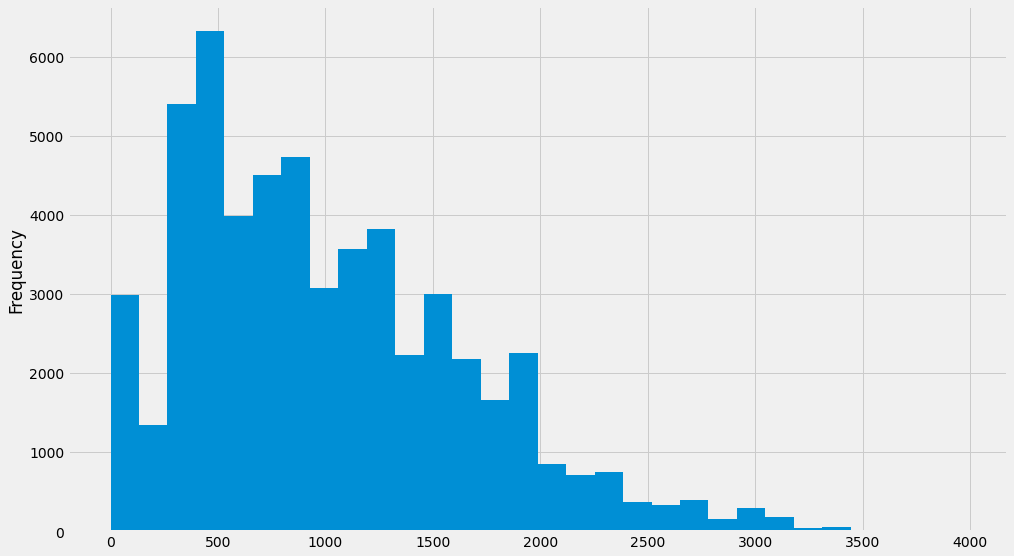

In [19]:
from datetime import datetime, timedelta

plt.style.use('fivethirtyeight')

listings['days_since_first_review'].dt.days.plot(kind='hist', bins=30, figsize=(15,9));
def categorise_col(col_name, new_col, bins, labels):
    listings[new_col] = pd.cut(listings[col_name], bins, labels=labels)
    listings[new_col] = listings[new_col].astype('str')
    listings[new_col] = listings[new_col].str.replace('nan', 'No reviews')
    listings[new_col] = listings[new_col].astype('category')
    
bins = pd.to_timedelta([0, 182, 365, 730, 1460, max(listings['days_since_first_review'])], unit='days')
labels = ['0-6 months',
           '6-12 months',
           '1-2 years',
           '2-3 years',
           '4+ years']
categorise_col('days_since_first_review', 'days_since_first_review_cats', bins, labels)

0

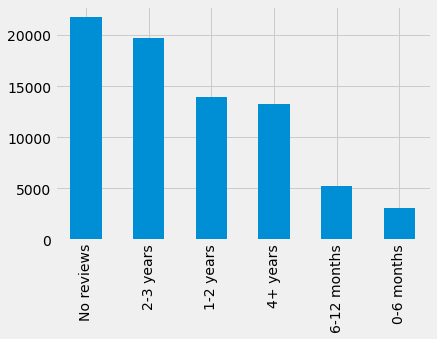

In [20]:
listings['days_since_first_review_cats'].value_counts().plot(kind='bar')
listings['days_since_first_review_cats'].isnull().sum()

In [21]:
listings['days_since_first_review_cats'].isnull().sum()

0

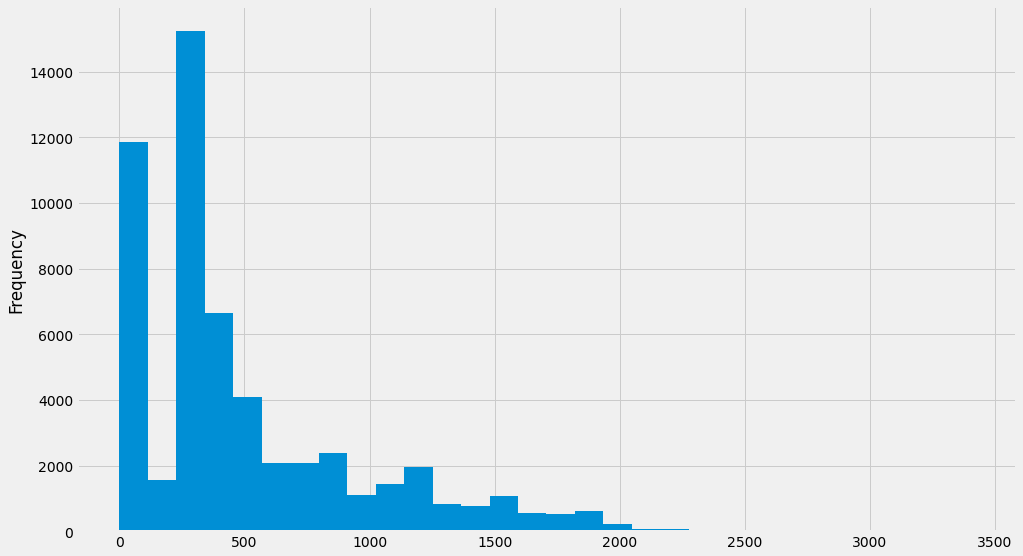

In [22]:
listings['days_since_last_review'].dt.days.plot(kind='hist', bins=30, figsize=(15,9));

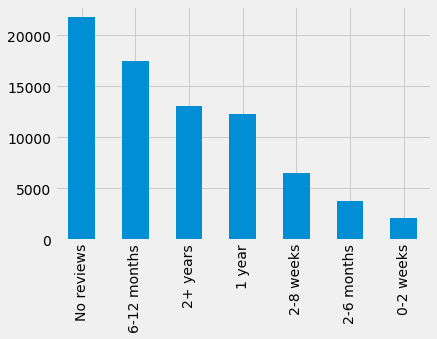

In [23]:
bins2 = pd.to_timedelta([0, 14, 60, 182, 365, 730, max(listings['days_since_last_review'])], unit='days')
labels2 = ['0-2 weeks', '2-8 weeks', '2-6 months', '6-12 months', '1 year', '2+ years']

categorise_col('days_since_last_review', 'days_since_last_review_cats', bins=bins2, labels=labels2)
listings['days_since_last_review_cats'].value_counts().plot(kind='bar');
listings['days_since_last_review_cats'].isnull().sum();

# # Storing the first_review column in a variable for Exploratory Data Analysis
# first_review = listings['first_review']
# review_scores_rating = listings['review_scores_rating']

# Review scores columns <a class="anchor" id="review_scores"></a>
Like above, ratings without reviews will be replaced by No reviews value, and we will also categorise these columns. The histrograms below will be a useful reference for us to decide on bins. Most of the ratings are above 9 points out of 10. reviews_scores_rating is a mean of other columns multiplied by 100 to represent the ratings in percentage.

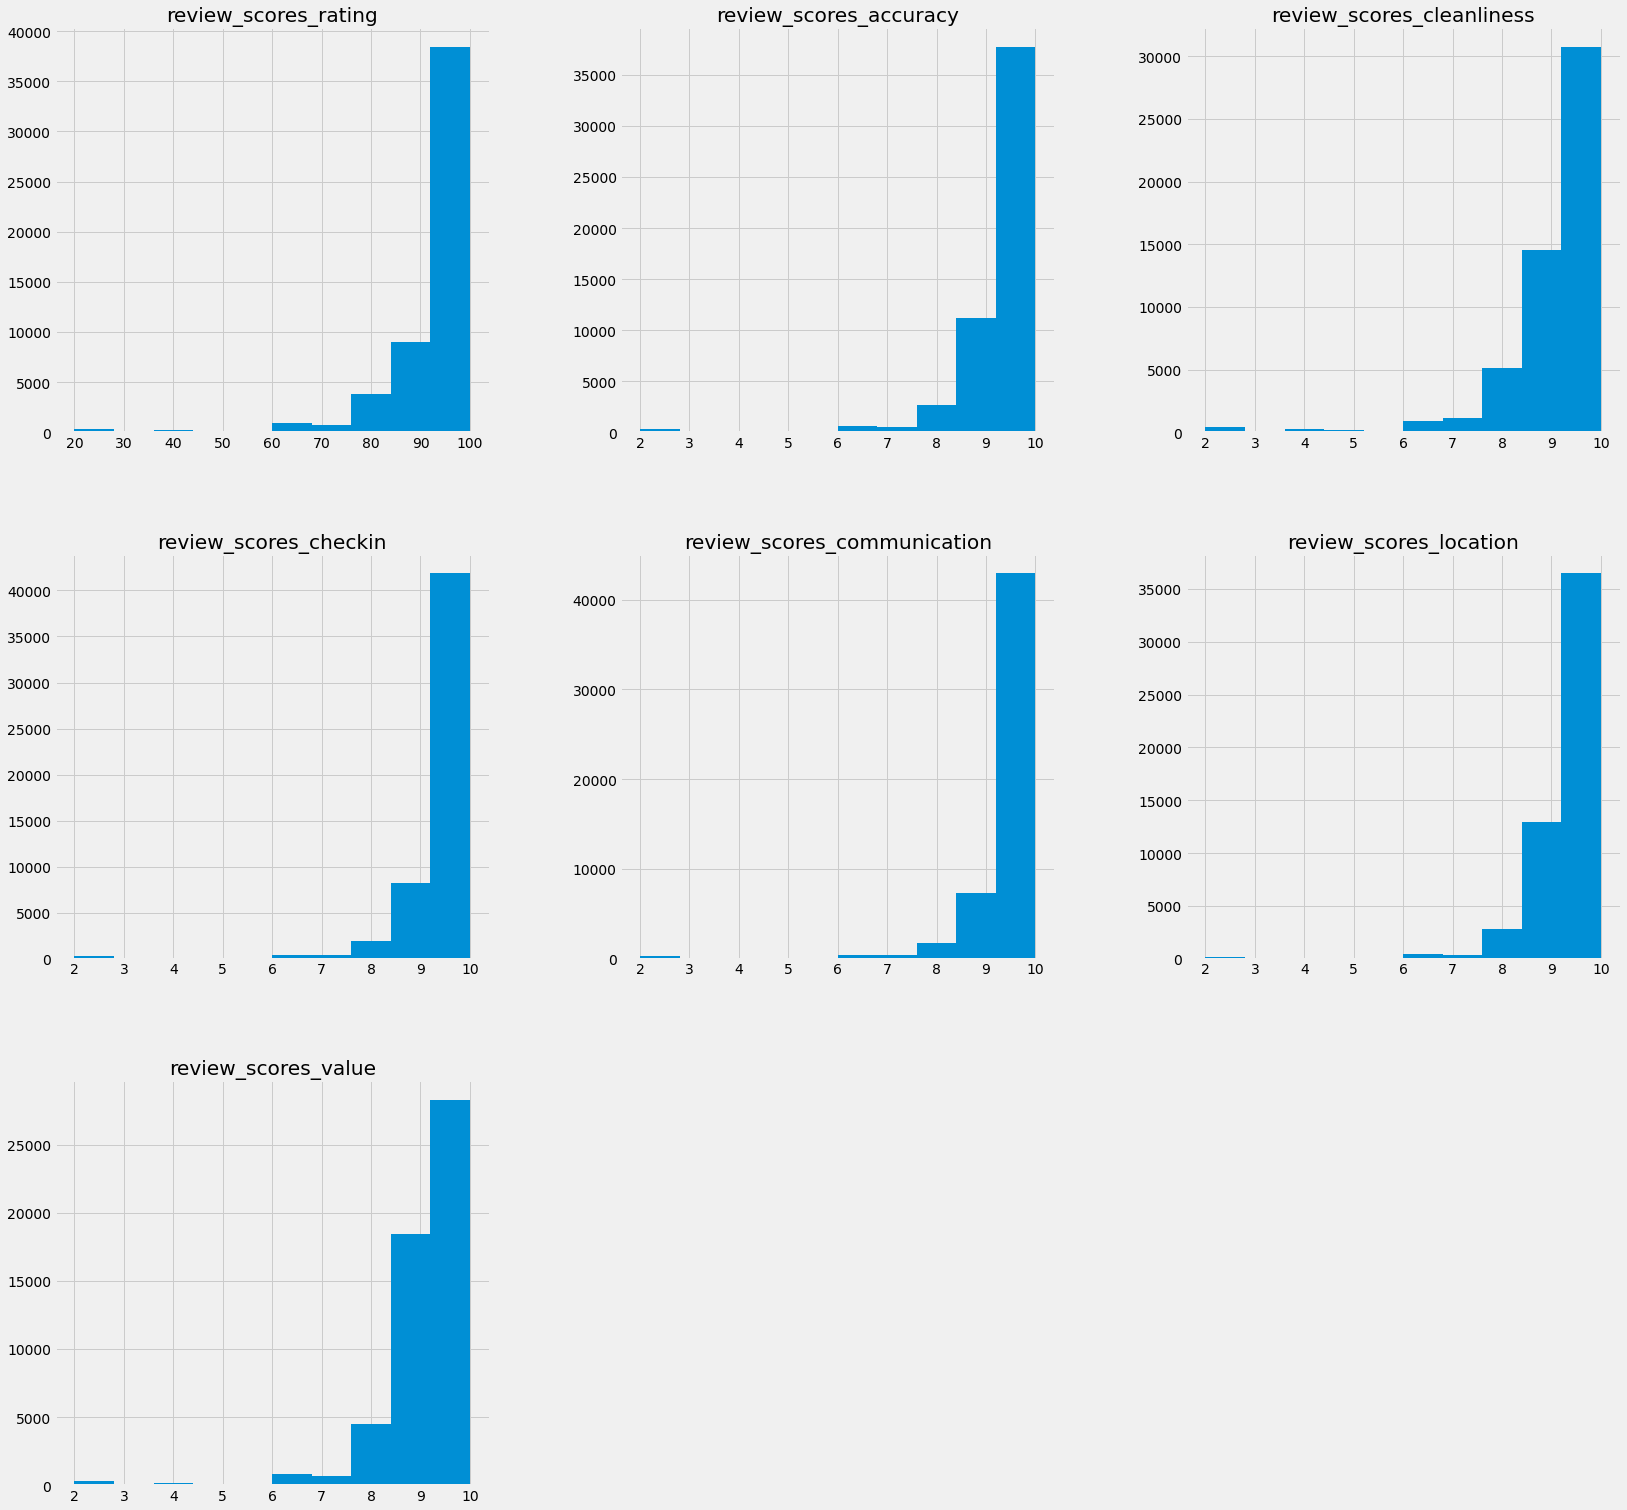

In [24]:
listings.isnull().sum().sort_values(ascending=False)
review_cols = listings.columns[listings.columns.str.startswith("review_scores")]
listings[review_cols].hist(figsize=(25, 25));

In [25]:
# Categorising columns out of 10
review_cols_10 = ['review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']
new_cols_10 = [s + "_cats" for s in review_cols_10]
bins3 = [0, 8, 9, 10]
labels3 = ['0-8/10', '9/10', '10/10']

for i, col in enumerate(review_cols_10):
    categorise_col(col, new_cols_10[i], bins=bins3, labels=labels3)

# Categorising column out of 10
categorise_col('review_scores_rating', 'review_scores_rating_cat', 
               bins=[0, 80, 95, 100], 
               labels=['0-79/100', '80-94/100', '95-100/100'])

# Dealing with outliers in prices <a class="anchor" id="price-outliers"></a>
Around 1.7% of listings' prices are greater than 400. So we will remove the rows with values > 400

1.7226819793953723


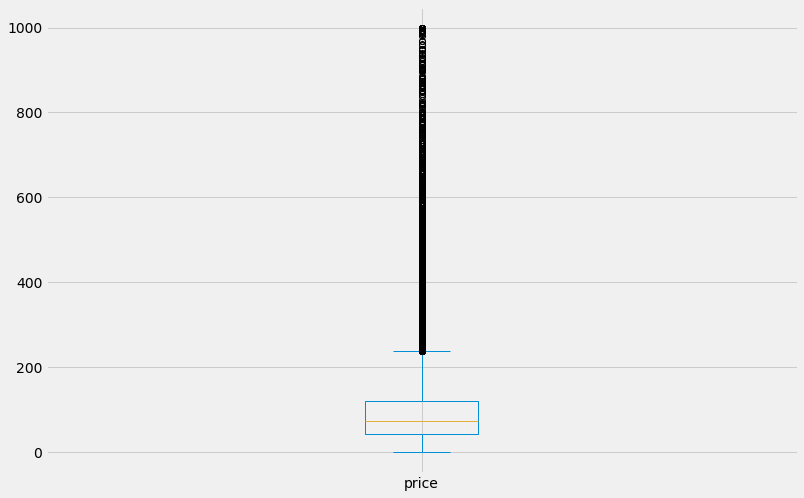

In [26]:
listings['price'].plot(kind='box', figsize=(12, 8));
print(100 * (len(listings[listings['price'] > 400]) / len(listings)))

listings = listings[listings['price'] < 400]

# Amenities <a class="anchor" id="amenities"></a>
Given that amenities are stored in a list, we will split the amenities and one-hot encoding them

In [27]:
import re

def one_hot_encode_amenities(df):
    '''
    INPUT: 
    df - Original dataframe
    OUTPUT: 
    df_amenities - One-hot encoded dataframe of amenities
    
    Create dummies from list of amenities
    
    '''
    

    def clean_amenities(row):
        '''
        Remove special characters and split the strings
        '''
        row = re.sub('[^A-Za-z,]+', '_', row).split(",")
        return row
    
    df['amenities'] = df['amenities'].apply(clean_amenities)
    # Create columns from list of amenities
    df_amenities = df.amenities.str.join('|').str.get_dummies().add_prefix('amenity')
    # Include only those amenities that are found in >5% of the listings
    df_amenities = df_amenities[df_amenities.columns[df_amenities.sum() > 0.05 * len(df_amenities)]]
    
    return df_amenities

amenities_df = one_hot_encode_amenities(listings)

In [28]:
# Remove amenities column
listings = listings.drop(['amenities'], axis=1)

#Concatenate dataframes
listings = pd.concat([listings, amenities_df], axis=1)

In [29]:
listings.head()

,last_scraped,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,...,amenity_Dryer_,amenity_Elevator_,amenity_Essentials_,amenity_Extra_pillows_and_blankets_,amenity_Fire_extinguisher_,amenity_First_aid_kit_,amenity_Free_parking_on_premises_,amenity_Free_street_parking_,amenity_Garden_or_backyard_,amenity_Hair_dryer_,amenity_Hangers_,amenity_Heating_,amenity_Host_greets_you_,amenity_Hot_water_,amenity_Indoor_fireplace_,amenity_Iron_,amenity_Kitchen_,amenity_Laptop_friendly_workspace_,amenity_Lock_on_bedroom_door_,amenity_Lockbox_,amenity_Long_term_stays_allowed_,amenity_Luggage_dropoff_allowed_,amenity_Microwave_,amenity_Oven_,amenity_Paid_parking_off_premises_,amenity_Patio_or_balcony_,amenity_Private_entrance_,amenity_Private_living_room_,amenity_Refrigerator_,amenity_Shampoo_,amenity_Shower_gel_,amenity_Single_level_home_,amenity_Smoke_alarm_,amenity_Stove_,amenity_TV_,amenity_Washer_,amenity_Wifi_
0,2020-11-07,100.0,100.0,0.0,3.0,3.0,1.0,1.0,Lambeth,51.46225,-0.11732,Entire apartment,Entire home/apt,4,1.0,1.0,3.0,97.0,7,190,0,0,4,279,192,7,0,2010-03-21,2020-03-26,91.0,9.0,9.0,10.0,10.0,9.0,9.0,1,...,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,1,1,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,1,1,1
1,2020-11-07,83.0,71.0,0.0,3.0,3.0,1.0,1.0,Islington,51.56802,-0.11121,Private room in apartment,Private room,2,1.0,1.0,0.0,40.0,1,29,30,60,90,365,21,2,0,2010-08-18,2020-02-22,97.0,10.0,10.0,10.0,10.0,9.0,9.0,0,...,1,0,1,1,1,0,0,1,0,1,1,1,1,1,0,1,1,1,1,0,1,1,0,1,1,1,0,0,1,1,0,0,1,1,1,1,1
2,2020-11-07,100.0,100.0,0.0,1.0,1.0,1.0,1.0,Kensington and Chelsea,51.48796,-0.16898,Entire apartment,Entire home/apt,2,1.0,1.0,1.0,75.0,10,50,0,20,50,150,89,1,0,2009-12-21,2020-03-16,96.0,10.0,10.0,10.0,10.0,10.0,9.0,1,...,1,0,1,0,1,0,0,0,0,1,1,1,0,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,0,0,1,0,1,1,1
3,2020-11-06,67.0,100.0,1.0,18.0,18.0,1.0,1.0,Westminster,51.52195,-0.14094,Entire apartment,Entire home/apt,6,2.0,3.0,3.0,307.0,4,365,25,55,85,330,42,0,0,2011-03-21,2019-11-02,94.0,10.0,9.0,9.0,9.0,10.0,9.0,0,...,1,1,1,0,0,0,0,0,0,1,1,1,0,1,0,1,1,1,0,1,1,0,1,1,1,0,0,0,1,1,0,0,1,1,1,1,1
4,2020-11-07,NaN,NaN,0.0,3.0,3.0,1.0,1.0,Hammersmith and Fulham,51.47935,-0.19743,Private room in bed and breakfast,Private room,2,1.0,1.0,1.0,150.0,3,21,29,59,89,364,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,1,0,0,0,0,0,0,1,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1


# Host_response_rate, host_acceptance_rate, reviews_per_month <a class="anchor" id="host-response"></a>
Empty host_response_rate, host_acceptance_rate, reviews_per_month will be filled by mean values

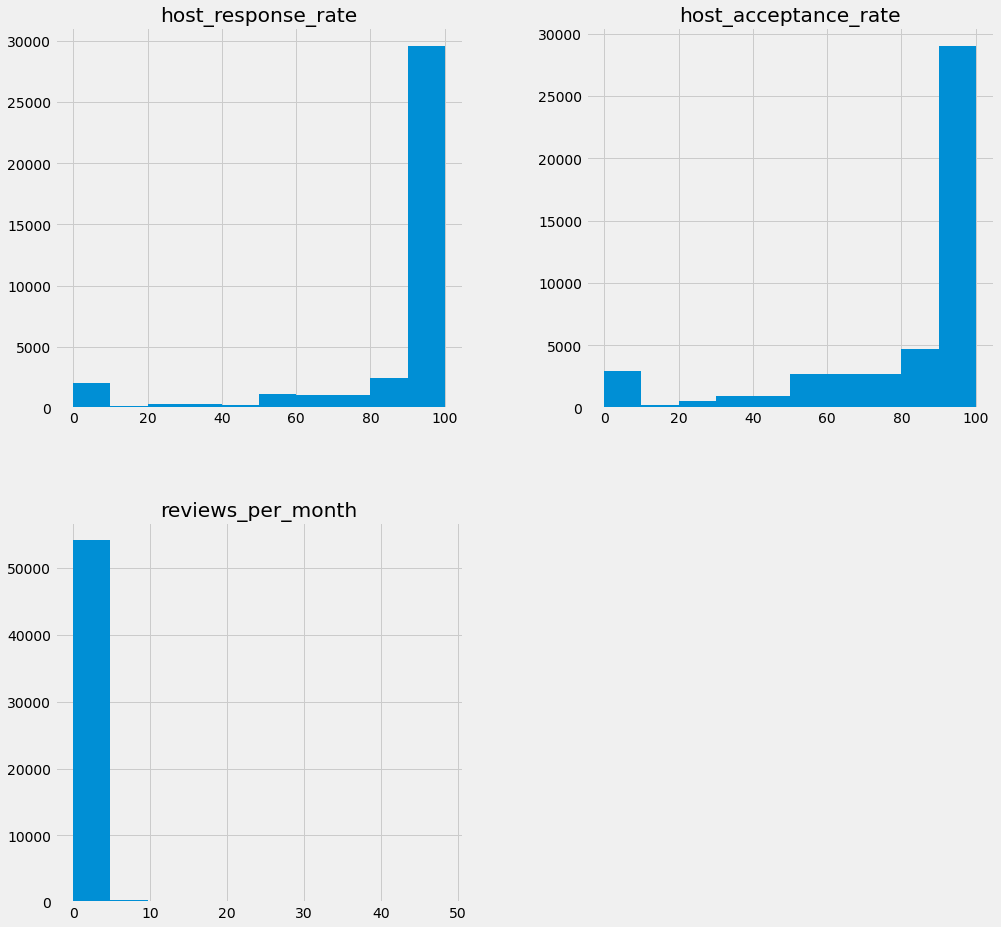

In [30]:
fill_mean = lambda col: col.fillna(col.mean())
listings[['host_response_rate', 'host_acceptance_rate', 'reviews_per_month']].hist(figsize=(15, 15));
listings[['host_response_rate', 'host_acceptance_rate', 'reviews_per_month']] = listings[['host_response_rate', 'host_acceptance_rate', 'reviews_per_month']].apply(fill_mean)

In [31]:
# pd.set_option('max_columns', None)
listings.head()
# pd.reset_option("max_columns")

,last_scraped,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,...,amenity_Dryer_,amenity_Elevator_,amenity_Essentials_,amenity_Extra_pillows_and_blankets_,amenity_Fire_extinguisher_,amenity_First_aid_kit_,amenity_Free_parking_on_premises_,amenity_Free_street_parking_,amenity_Garden_or_backyard_,amenity_Hair_dryer_,amenity_Hangers_,amenity_Heating_,amenity_Host_greets_you_,amenity_Hot_water_,amenity_Indoor_fireplace_,amenity_Iron_,amenity_Kitchen_,amenity_Laptop_friendly_workspace_,amenity_Lock_on_bedroom_door_,amenity_Lockbox_,amenity_Long_term_stays_allowed_,amenity_Luggage_dropoff_allowed_,amenity_Microwave_,amenity_Oven_,amenity_Paid_parking_off_premises_,amenity_Patio_or_balcony_,amenity_Private_entrance_,amenity_Private_living_room_,amenity_Refrigerator_,amenity_Shampoo_,amenity_Shower_gel_,amenity_Single_level_home_,amenity_Smoke_alarm_,amenity_Stove_,amenity_TV_,amenity_Washer_,amenity_Wifi_
0,2020-11-07,100.000000,100.000000,0.0,3.0,3.0,1.0,1.0,Lambeth,51.46225,-0.11732,Entire apartment,Entire home/apt,4,1.0,1.0,3.0,97.0,7,190,0,0,4,279,192,7,0,2010-03-21,2020-03-26,91.0,9.0,9.0,10.0,10.0,9.0,9.0,1,...,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,1,1,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,1,1,1
1,2020-11-07,83.000000,71.000000,0.0,3.0,3.0,1.0,1.0,Islington,51.56802,-0.11121,Private room in apartment,Private room,2,1.0,1.0,0.0,40.0,1,29,30,60,90,365,21,2,0,2010-08-18,2020-02-22,97.0,10.0,10.0,10.0,10.0,9.0,9.0,0,...,1,0,1,1,1,0,0,1,0,1,1,1,1,1,0,1,1,1,1,0,1,1,0,1,1,1,0,0,1,1,0,0,1,1,1,1,1
2,2020-11-07,100.000000,100.000000,0.0,1.0,1.0,1.0,1.0,Kensington and Chelsea,51.48796,-0.16898,Entire apartment,Entire home/apt,2,1.0,1.0,1.0,75.0,10,50,0,20,50,150,89,1,0,2009-12-21,2020-03-16,96.0,10.0,10.0,10.0,10.0,10.0,9.0,1,...,1,0,1,0,1,0,0,0,0,1,1,1,0,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,0,0,1,0,1,1,1
3,2020-11-06,67.000000,100.000000,1.0,18.0,18.0,1.0,1.0,Westminster,51.52195,-0.14094,Entire apartment,Entire home/apt,6,2.0,3.0,3.0,307.0,4,365,25,55,85,330,42,0,0,2011-03-21,2019-11-02,94.0,10.0,9.0,9.0,9.0,10.0,9.0,0,...,1,1,1,0,0,0,0,0,0,1,1,1,0,1,0,1,1,1,0,1,1,0,1,1,1,0,0,0,1,1,0,0,1,1,1,1,1
4,2020-11-07,87.772666,81.321339,0.0,3.0,3.0,1.0,1.0,Hammersmith and Fulham,51.47935,-0.19743,Private room in bed and breakfast,Private room,2,1.0,1.0,1.0,150.0,3,21,29,59,89,364,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,1,0,0,0,0,0,0,1,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1


# Correlation Analysis <a class="anchor" id="correlation-analysis"></a>

In [32]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor


listings.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75487 entries, 0 to 76983
Data columns (total 100 columns):
 #   Column                                        Non-Null Count  Dtype          
---  ------                                        --------------  -----          
 0   last_scraped                                  75487 non-null  datetime64[ns] 
 1   host_response_rate                            75487 non-null  float64        
 2   host_acceptance_rate                          75487 non-null  float64        
 3   host_is_superhost                             75487 non-null  float64        
 4   host_listings_count                           75487 non-null  float64        
 5   host_total_listings_count                     75487 non-null  float64        
 6   host_has_profile_pic                          75487 non-null  float64        
 7   host_identity_verified                        75487 non-null  float64        
 8   neighbourhood_cleansed                        75487 non

Text(0.5, 1.0, 'Correlation Heatmap')

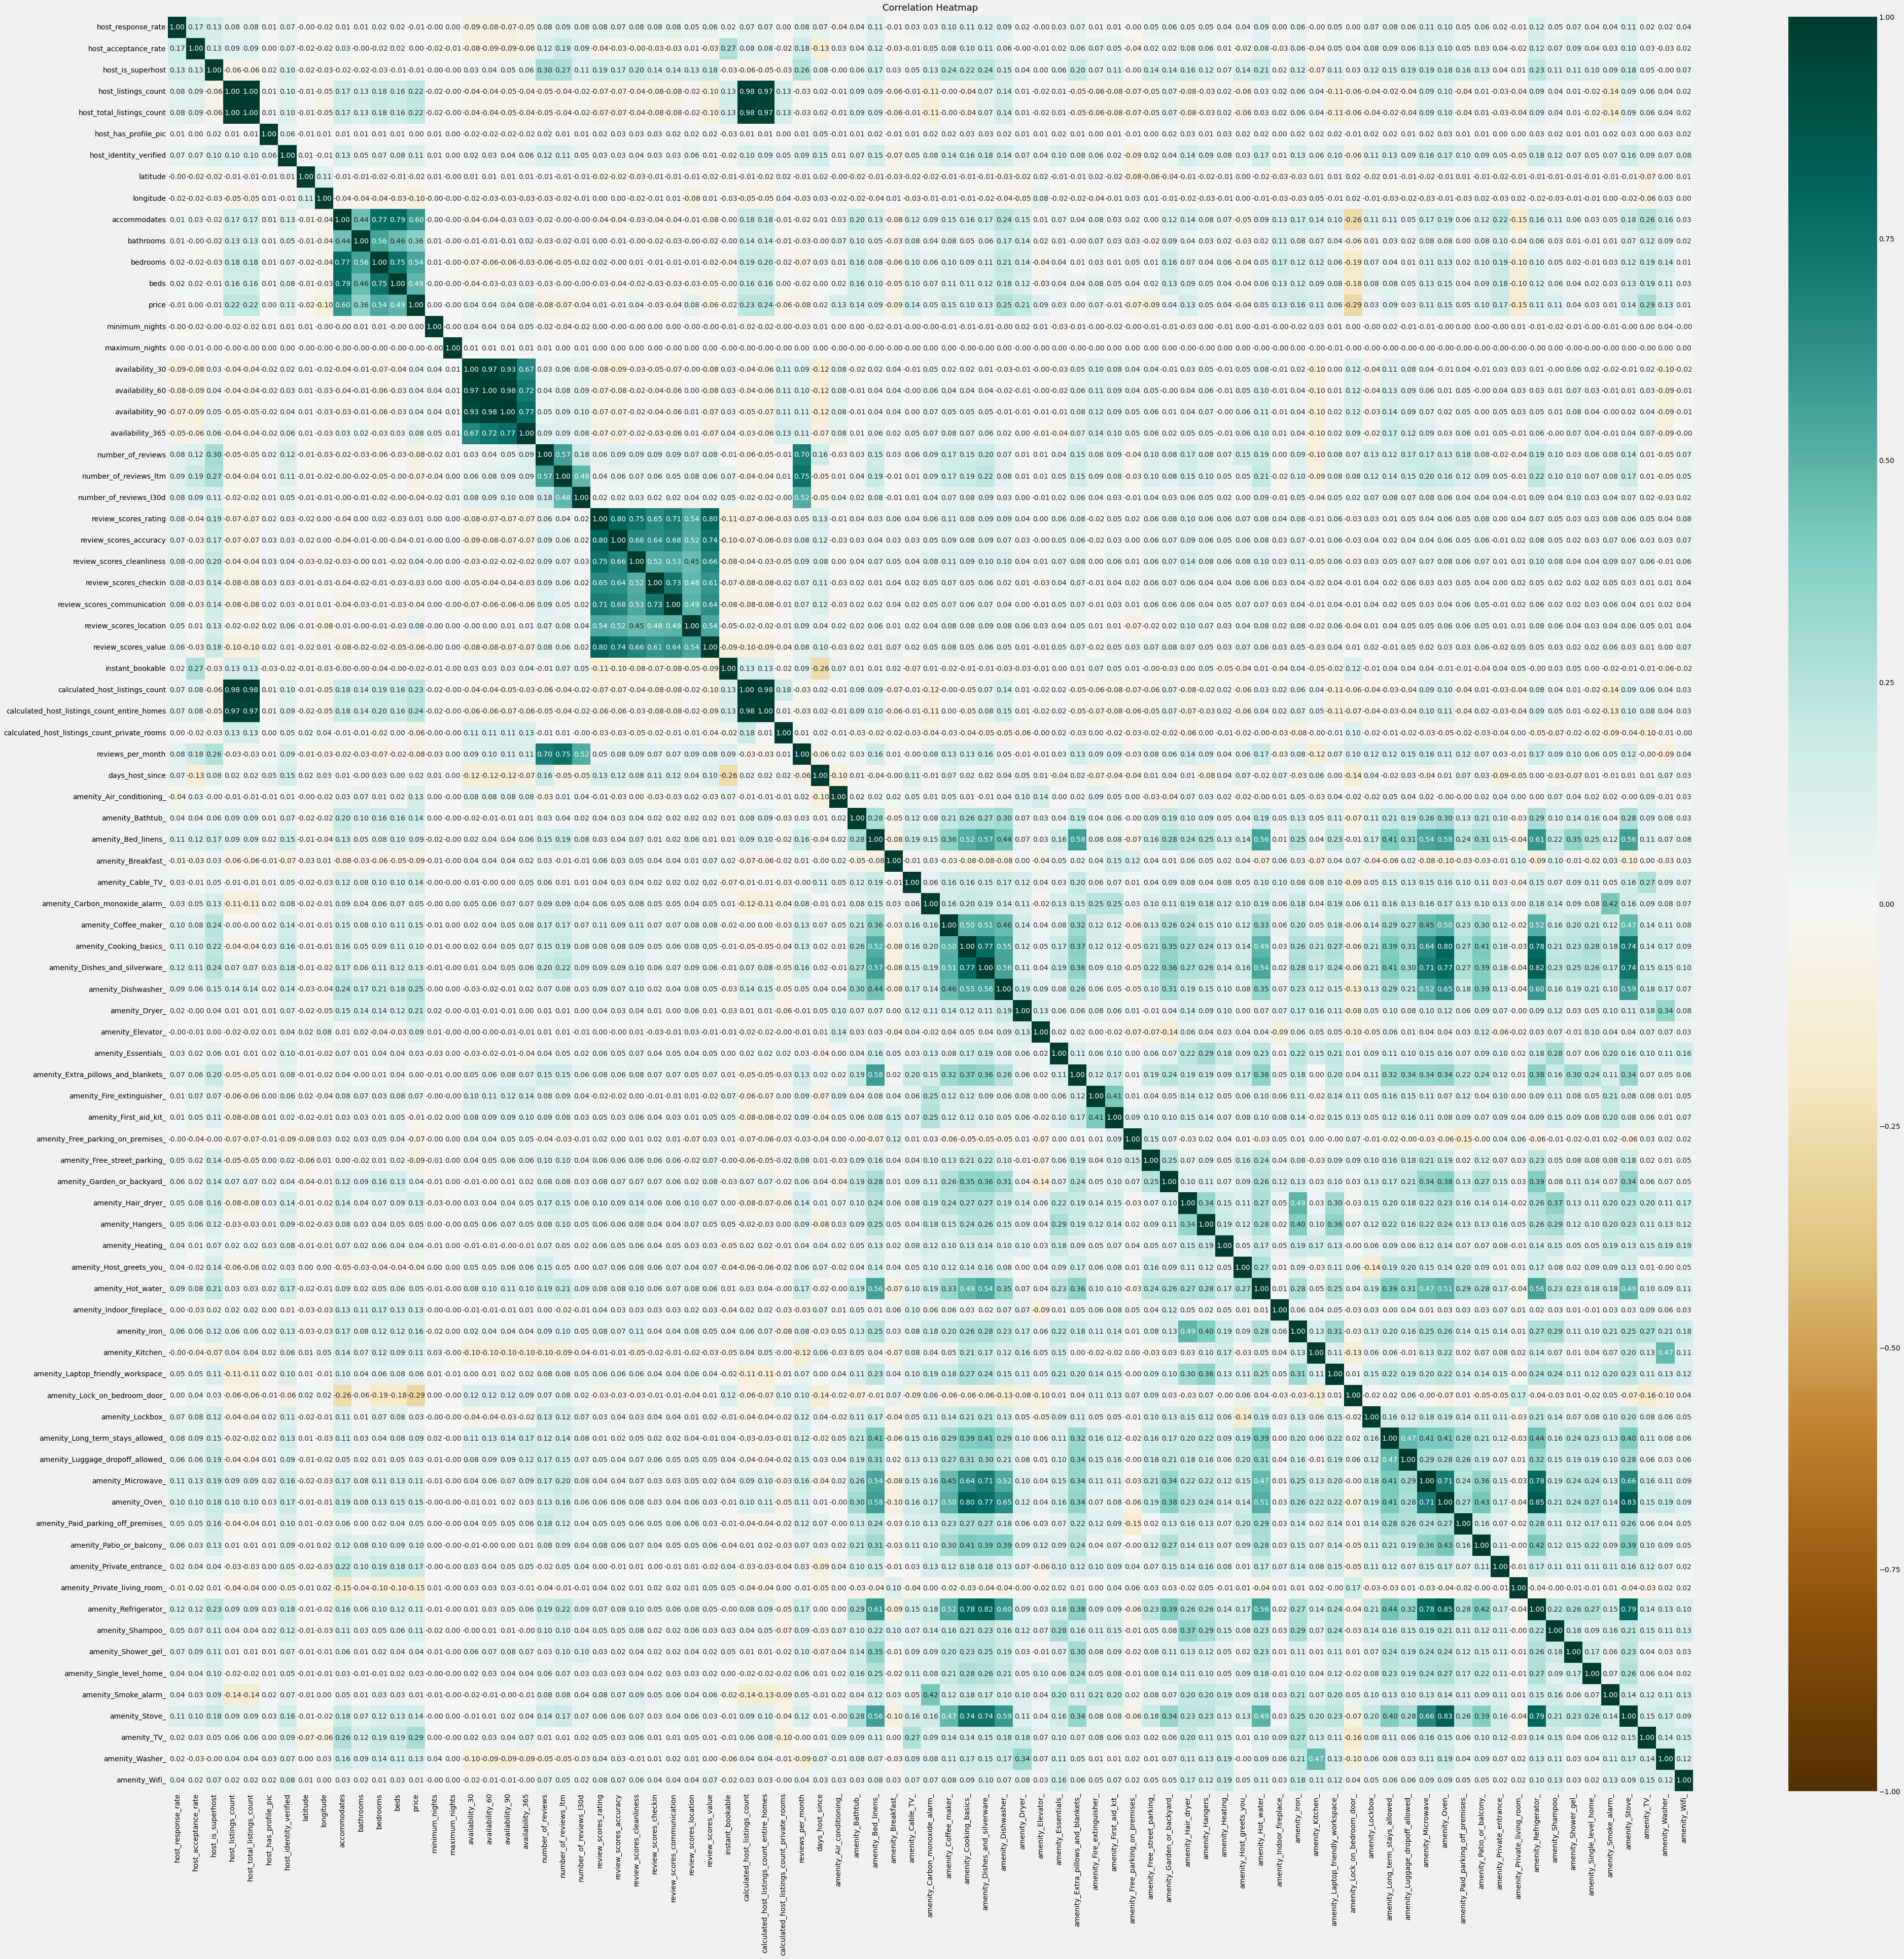

In [33]:
plt.figure(figsize=(60, 60))
feature_correlation = listings.corr()

# plt.figure(figsize=(5, 30))
# feature_correlation = listings.corr()[['price']].sort_values(by='price', ascending=False)

mask = (feature_correlation > 0.15) & (feature_correlation < 0.95) & (feature_correlation != 1)
# feature_correlation = feature_correlation[mask]

# Show all features.
# heatmap = sns.heatmap(feature_correlation, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='BrBG')

# Show only price feature
heatmap = sns.heatmap(feature_correlation, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

In [34]:
feature_correlation_price = abs(feature_correlation['price'])
mask = (feature_correlation_price > 0.10) & (feature_correlation_price < 0.95) & (feature_correlation_price != 1)

# Columns to keep
columns_to_keep = list(feature_correlation_price[mask].index)

final_listings = listings[columns_to_keep]

# Improve performance of ML algorithm due to smaller values. ML algorithms see larger numbers as more impactful.
final_listings_scaled = MinMaxScaler().fit_transform(final_listings)
final_listings_scaled_df = pd.DataFrame(final_listings_scaled, columns=final_listings.columns)
final_listings_scaled_df.head()

# final_listings = final_listings.drop(['host_listings_count', 'host_total_listings_count'], axis=1)

# Visualize cleaned dataset
# final_listings_corr = final_listings_scaled_df.corr()

# For each X, calculate VIF and save in dataframe
# vif = pd.DataFrame()
# vif["VIF"] = [variance_inflation_factor(final_listings_corr.values, i) for i in range(final_listings_corr.shape[1])]
# vif["features"] = final_listings_corr.columns
# vif = vif.round(1)

# pd.set_option('max_rows', None)
# display(vif.sort_values('VIF', ascending=False))

# plt.figure(figsize=(10, 30))
# heatmap = sns.heatmap(abs(feature_correlation[['price']]).sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='BrBG')
# heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

# NOTE: Talk about a lot of multicolliniarity in the final dataset.
# We could try and resolve this to get better performance of the regression model but that is outside the scope of this coursework.
# Just know that this multicolliniarity could be having an effect.
# We could play around with this by removing features with high VIF although this is not ideal due to the resulting loss of relevent information.

# SKLearn - Grid search/Random search to test different hyperparameters

,host_listings_count,host_total_listings_count,host_identity_verified,longitude,accommodates,bathrooms,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_entire_homes,amenity_Air_conditioning_,amenity_Bathtub_,amenity_Cable_TV_,amenity_Coffee_maker_,amenity_Dishes_and_silverware_,amenity_Dishwasher_,amenity_Dryer_,amenity_Hair_dryer_,amenity_Indoor_fireplace_,amenity_Iron_,amenity_Kitchen_,amenity_Lock_on_bedroom_door_,amenity_Microwave_,amenity_Oven_,amenity_Patio_or_balcony_,amenity_Private_entrance_,amenity_Private_living_room_,amenity_Refrigerator_,amenity_Shampoo_,amenity_Stove_,amenity_TV_,amenity_Washer_
0,0.002013,0.002013,1.0,0.483232,0.200000,0.028571,0.000000,0.06,0.001140,0.002281,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
1,0.002013,0.002013,1.0,0.491011,0.066667,0.028571,0.000000,0.00,0.001140,0.001140,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
2,0.000671,0.000671,1.0,0.417460,0.066667,0.028571,0.000000,0.02,0.000000,0.001140,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,0.012081,0.012081,1.0,0.453160,0.333333,0.057143,0.040816,0.06,0.015964,0.017104,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,0.002013,0.002013,1.0,0.381239,0.066667,0.028571,0.000000,0.02,0.001140,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor


X = final_listings_scaled_df
y = listings['price']

# Prepare the cross-validation procedure
# cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=15)

# Split into train and test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

# random_forest_regressor = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=15, n_jobs=-2)

# random_forest_regressor.fit(X_train, y_train.squeeze())
# y_pred = random_forest_regressor.predict(X_test)
# print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
# print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
# print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

# scores = cross_val_score(random_forest_regressor, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-2)
# print('MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

param_grid = {
    'bootstrap': [True, False],
    # Maximum number of levels in tree
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'criterion': ["squared_error", "absolute_error", "poisson"]
}
param_grid['max_depth'].append(None)
print(param_grid)

random_forest_regressor = RandomForestRegressor(n_jobs=-3)
# Instantiate the random search model
random_search = RandomizedSearchCV(estimator = random_forest_regressor, param_distributions= param_grid, n_iter = 100, cv = 3, n_jobs = -3, verbose = 2)

# Fit the grid search to the data
random_search.fit(X, y)

print(random_search.best_params_)

# def evaluate(model, test_features, test_labels):
#     predictions = model.predict(test_features)
#     errors = abs(predictions - test_labels)
#     mape = 100 * np.mean(errors / test_labels)
#     accuracy = 100 - mape
#     print('Model Performance')
#     print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
#     print('Accuracy = {:0.2f}%.'.format(accuracy))
    
#     return accuracy

# best_grid = random_search.best_estimator_
# grid_accuracy = evaluate(best_grid, X, y)

{'bootstrap': [True, False], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'criterion': ['squared_error', 'absolute_error', 'poisson']}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


exception calling callback for <Future at 0x1d25c4d53c0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "C:\Users\Emre\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\Users\Emre\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", line 359, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\Emre\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", line 794, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Users\Emre\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Emre\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.
